In [ ]:
from operator import methodcaller
from functools import partial

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from minisom import MiniSom 
from rx import Observable

In [5]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [6]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [7]:
list(df)

['Serial No.',
 'GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']

In [8]:
df.drop(['Serial No.'], axis=1, inplace=True)

In [9]:
sum(df.isnull().sum(), df.isna().sum())

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [10]:
df['Chance of Admit '] = (df['Chance of Admit '] >= .7).astype(int)

In [11]:
X = df['Chance of Admit '].astype('int8')
df.drop('Chance of Admit ', axis=1, inplace=True)

In [12]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000


In [13]:
df = df.apply(lambda col: col / col.max())

In [14]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,0.930800,0.893267,0.622800,0.674800,0.69680,0.864560,0.560000
std,0.033221,0.050682,0.228702,0.198201,0.18509,0.060969,0.496884
min,0.852941,0.766667,0.200000,0.200000,0.20000,0.685484,0.000000
25%,0.905882,0.858333,0.400000,0.500000,0.60000,0.819304,0.000000
50%,0.932353,0.891667,0.600000,0.700000,0.70000,0.862903,1.000000
75%,0.955882,0.933333,0.800000,0.800000,0.80000,0.911290,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [37]:
kmeans = KMeans(n_clusters=2, random_state=20)

y_pred = kmeans.fit_predict(df[['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research']])

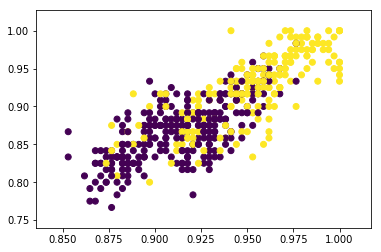

In [28]:
plt.scatter(df['GRE Score'], df['TOEFL Score'],  c=y_pred)

In [38]:
metrics.fowlkes_mallows_score(X, y_pred)

0.6239737674793768

In [39]:
y_pred = kmeans.fit_predict(df[['GRE Score', 'TOEFL Score', 'SOP','LOR ','CGPA']])

In [40]:
metrics.fowlkes_mallows_score(X, y_pred)

0.6310530487675525

In [46]:
# SOM
data = df[['GRE Score', 'TOEFL Score', 'SOP', 'LOR ','CGPA','University Rating','Research']].values

In [68]:
som = MiniSom(20, 20, 7, sigma=0.5, learning_rate=0.7)
som.train_random(data, 1000)

In [69]:
qnt = som.quantization(data)
qnt[1]

array([0.40149963, 0.37912606, 0.3280865 , 0.38487311, 0.38027047,
       0.33929658, 0.42375184])

In [75]:
# Hierarquical

Y = df[['GRE Score', 'TOEFL Score', 'SOP', 'LOR ','CGPA','University Rating','Research']].values

In [76]:
hiec_clust = AgglomerativeClustering(n_clusters=2, linkage='single')
y_pred = hiec_clust.fit_predict(Y)
metrics.fowlkes_mallows_score(X, y_pred)

0.6239737674793768

In [77]:
Y = df[['GRE Score', 'TOEFL Score', 'SOP', 'LOR ','CGPA']].values

In [78]:
hiec_clust = AgglomerativeClustering(n_clusters=2, linkage='single')
y_pred = hiec_clust.fit_predict(Y)
metrics.fowlkes_mallows_score(X, y_pred)

0.7177730396475843